# Unit 3 - Lesson 3 - Drill - Ridge vs. Lasso Regression

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [4]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


Checking predictive power using the test set:

In [5]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914476


## Regularization parameter: Lasso

The $\lambda$ for lasso can var between 0 (no penalty, acts like OLS) and infinity.  If $\lambda$ is too large, all parameters will be set to zero.  

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?

Submit your work and discuss the results with your mentor.

In [6]:
# Your code here
ridge_scores = []
lasso_scores = []

for lambd in range(0, 101):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    print('Ridge lambda = ', lambd)
    ridge_score = ridgeregrBig.score(X_train2, Y_train)
    ridge_scores.append(ridge_score)
    print('R^2 for Ridge: ', ridge_score)

    lassBig = linear_model.Lasso(alpha=lambd/100)
    lassBig.fit(X_train2, Y_train)
    print('Lasso lambda = ', lambd/100)
    lasso_score = lassBig.score(X_train2, Y_train)
    lasso_scores.append(lasso_score)
    print('R^2 for Ridge: ', lasso_score)
    print()

Ridge lambda =  0
R^2 for Ridge:  0.5739733101701104
Lasso lambda =  0.0
R^2 for Ridge:  0.5739444483155421

Ridge lambda =  1
R^2 for Ridge:  0.5739686014516844
Lasso lambda =  0.01
R^2 for Ridge:  0.5737681044618193

Ridge lambda =  2
R^2 for Ridge:  0.5739638611811897
Lasso lambda =  0.02
R^2 for Ridge:  0.5733739342611162

Ridge lambda =  3
R^2 for Ridge:  0.5739600301399501
Lasso lambda =  0.03
R^2 for Ridge:  0.5727518413871451

Ridge lambda =  4
R^2 for Ridge:  0.5739570041443959
Lasso lambda =  0.04
R^2 for Ridge:  0.5720087276567742

Ridge lambda =  5
R^2 for Ridge:  0.5739545553546754
Lasso lambda =  0.05
R^2 for Ridge:  0.5710532985531875

Ridge lambda =  6
R^2 for Ridge:  0.5739525094004936
Lasso lambda =  0.06
R^2 for Ridge:  0.5698849880664936

Ridge lambda =  7
R^2 for Ridge:  0.5739507454493923
Lasso lambda =  0.07
R^2 for Ridge:  0.5685046614224027

Ridge lambda =  8
R^2 for Ridge:  0.5739491802023777
Lasso lambda =  0.08
R^2 for Ridge:  0.5669119701418983

Ridge lambd

R^2 for Ridge:  0.573779896553279
Lasso lambda =  0.81
R^2 for Ridge:  0.02683413473126894

Ridge lambda =  82
R^2 for Ridge:  0.5737759692476359
Lasso lambda =  0.82
R^2 for Ridge:  0.026834134713279226

Ridge lambda =  83
R^2 for Ridge:  0.5737719971039552
Lasso lambda =  0.83
R^2 for Ridge:  0.02683413469506879

Ridge lambda =  84
R^2 for Ridge:  0.5737679801690705
Lasso lambda =  0.84
R^2 for Ridge:  0.02683413467663764

Ridge lambda =  85
R^2 for Ridge:  0.5737639184904146
Lasso lambda =  0.85
R^2 for Ridge:  0.026834134657985894

Ridge lambda =  86
R^2 for Ridge:  0.5737598121159795
Lasso lambda =  0.86
R^2 for Ridge:  0.02683413463911322

Ridge lambda =  87
R^2 for Ridge:  0.5737556610942818
Lasso lambda =  0.87
R^2 for Ridge:  0.026834134620019823

Ridge lambda =  88
R^2 for Ridge:  0.573751465474329
Lasso lambda =  0.88
R^2 for Ridge:  0.02683413460070572

Ridge lambda =  89
R^2 for Ridge:  0.5737472253055875
Lasso lambda =  0.89
R^2 for Ridge:  0.02683413458117101

Ridge lamb

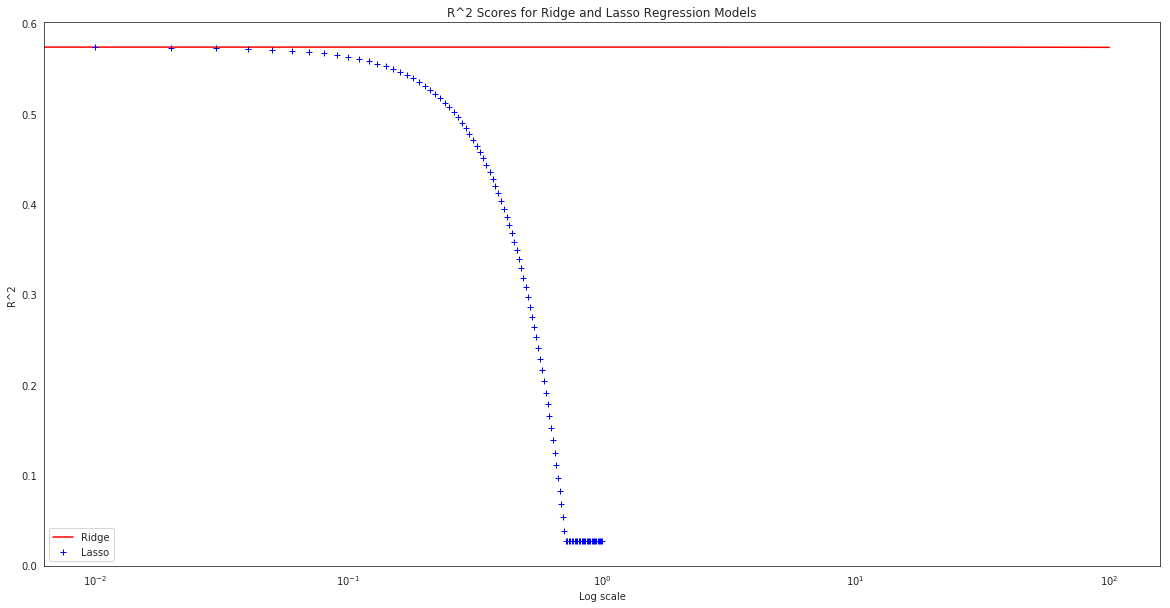

In [7]:
plt.figure(figsize=(20,10))
plt.semilogx(list(range(101)), ridge_scores, 'r-', label='Ridge')
plt.semilogx([x/100 for x in list(range(101))], lasso_scores, 'b+',  label='Lasso')

plt.title('R^2 Scores for Ridge and Lasso Regression Models')
plt.xlabel('Log scale')
plt.ylabel('R^2')

plt.legend()
plt.show()

# Summary

Lasso and ridge regression are both clear improvements on OLS regression.  Ridge regression is an excellent tool to use with correlated features, while lasso is an efficient method of feature selection when dealing with an unmanageably large feature space. 